In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/agnis/Downloads/Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
import sklearn
from sklearn import preprocessing, svm 
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

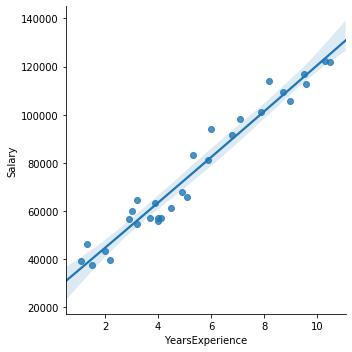

In [7]:
sb.lmplot(x ="YearsExperience", y ="Salary", data = data, order =2)

In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
y_pred

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [14]:
y_test

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.],
       [112635.],
       [ 55794.],
       [ 83088.]])

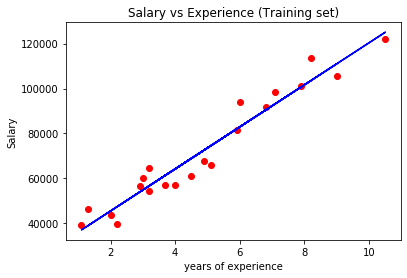

In [15]:
#Visualizing the Training set results 

plt.scatter(X_train,y_train, color='red',)
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

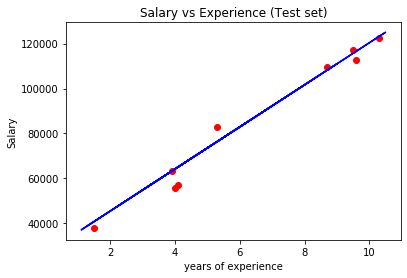

In [16]:
#Visualizing the Test Set results
plt.scatter(X_test,y_test, color='red',)
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

In [ ]:


#This is the final predicted machine learning model using simple linear regression.



In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# polynomial regression model
# degree 2 means it will add one more column to your dataset with X to the power 2. X^2.
# You will observer, there is one more column on X_poly at the 0th position(1st column) which has value 1 for
# all rows. It is added by PolynomialFeatures. It is the intercept value 'c' in Y=c+ m1*x + m2*x^2
lr_poly = LinearRegression()
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

In [19]:
X_poly

array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.8 ,  46.24],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

In [20]:
lr_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

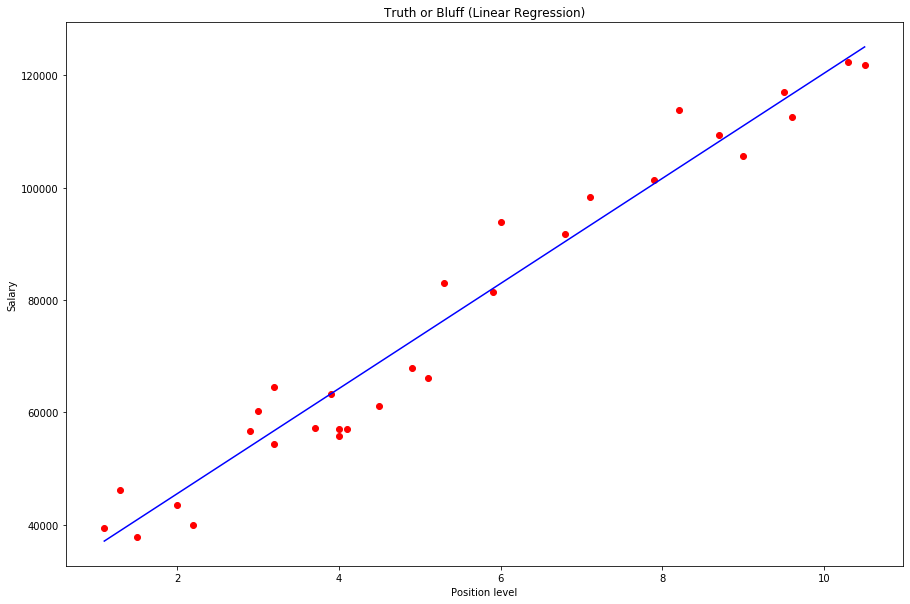

In [22]:
plt.figure(figsize=(15, 10))
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Red is actual Salaries and blue line is predicted salaries.
# So here we can see that best fitted line is also not a good regressor for the output. You can compare that
# Mostly Salaries are very far from actual values. Now lets see what our polynomial model shows

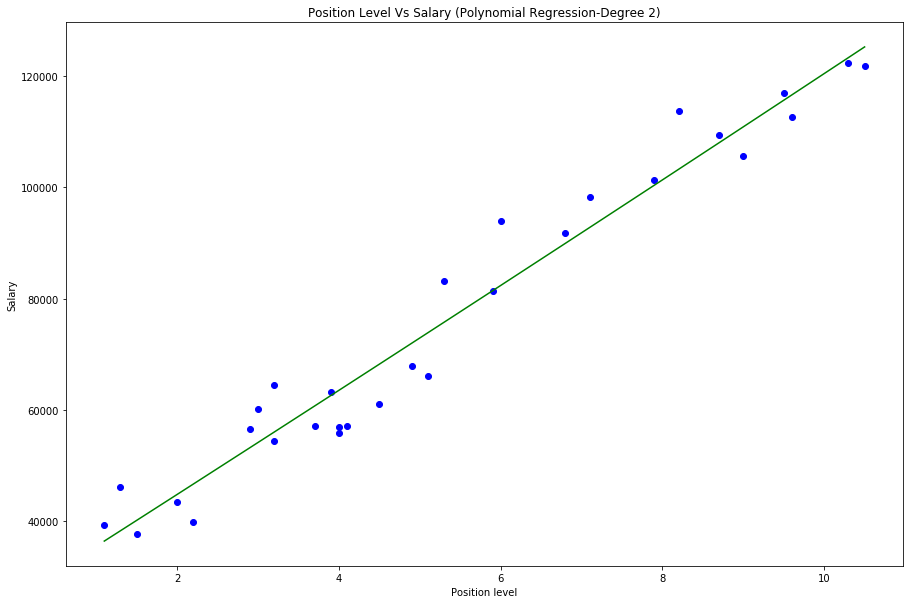

In [24]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(15, 10))
plt.scatter(X, y, color = 'blue')
plt.plot(X, lr_poly.predict(poly_reg.fit_transform(X)), color = 'green')
plt.title('Position Level Vs Salary (Polynomial Regression-Degree 2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [25]:
# polynomial regression model

lr_poly = LinearRegression()
poly_reg = PolynomialFeatures(degree = 3) # change form 2 to 3
X_poly = poly_reg.fit_transform(X)
lr_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

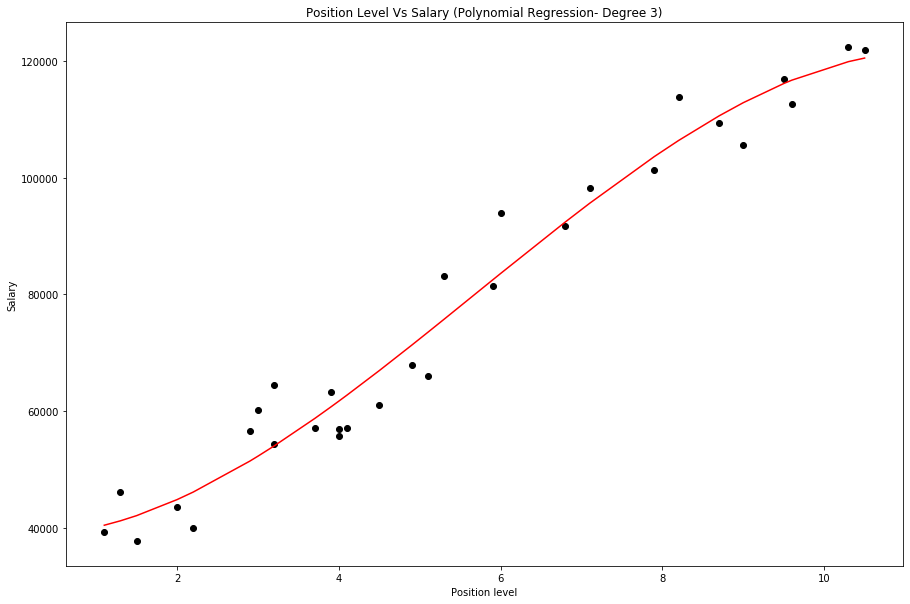

In [28]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(15, 10))
plt.scatter(X, y, color = 'black')
plt.plot(X, lr_poly.predict(poly_reg.fit_transform(X)), color = 'red')
plt.title('Position Level Vs Salary (Polynomial Regression- Degree 3)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# So now you can see as we increaed our degree parameter from 2 to 3, salary predictions are even better.